In [ ]:
# 線形代数
import numpy as np

# データ処理、CSVファイルの読み込み（例：pd.read_csv）
import pandas as pd

# プロット描画
import matplotlib.pyplot as plt

# 可視化ツール
import seaborn as sns



In [ ]:
df_train = pd.read_csv(r"./train.csv")
df_no_na = df_train.dropna()
df = df_no_na[df_no_na['Expected'] <= 100]
# List of column names to be deleted
columns_to_delete = ['Id', 'Ref_5x5_10th', 'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th', 'RefComposite_5x5_50th', 'RefComposite_5x5_90th']

# Delete the columns from the dataframe
df = df.drop(columns=columns_to_delete)


In [11]:
df = df.sample(n=50000)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Split the data into training, validation and testing sets
X = df.drop('Expected', axis=1)
y = df['Expected']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # Reserve 40% for validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split the remaining data into validation and testing sets

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))  # First layer with 128 units
model.add(Dense(64))  # Second layer with 64 units
model.add(Dense(32, activation='relu'))  # Third layer with 32 units and ReLU activation
model.add(Dense(16))  # Fourth layer with 16 units
model.add(Dense(8))  # Fifth layer with 8 units
model.add(Dense(1))  # Output layer with 1 unit

# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Set the initial learning rate
# initial_learning_rate = 0.1

# # Set the decay steps and rate
# decay_steps = 2
# decay_rate = 0.5

# # Define the learning rate schedule
# lr_schedule = ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=decay_steps,
#     decay_rate=decay_rate,
#     staircase=True)

# Create the optimizer with the learning rate schedule
opt = Adam(learning_rate=0.001)

# The rest of the code is the same...

model.compile(loss='mean_squared_error', optimizer=opt)
# model.compile(loss='hinge', optimizer=opt)

# Train the model with validation data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)





Epoch 1/10
375/375 [==============================] - 17s 36ms/step - loss: 0.0720 - val_loss: 0.0338
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0275 - val_loss: 0.0148
Epoch 3/10
375/375 [==============================] - 17s 44ms/step - loss: 0.0106 - val_loss: 0.0041
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0019 - val_loss: 7.6411e-04
Epoch 6/10
375/375 [==============================] - 9s 24ms/step - loss: 7.6678e-04 - val_loss: 2.6322e-04
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 2.7329e-04 - val_loss: 8.1520e-05
Epoch 8/10
375/375 [==============================] - 7s 19ms/step - loss: 1.0348e-04 - val_loss: 5.4255e-05
Epoch 9/10
375/375 [==============================] - 7s 17ms/step - loss: 3.4226e-05 - val_loss: 4.2645e-05
Epoch 10/10
125/125 [==============================

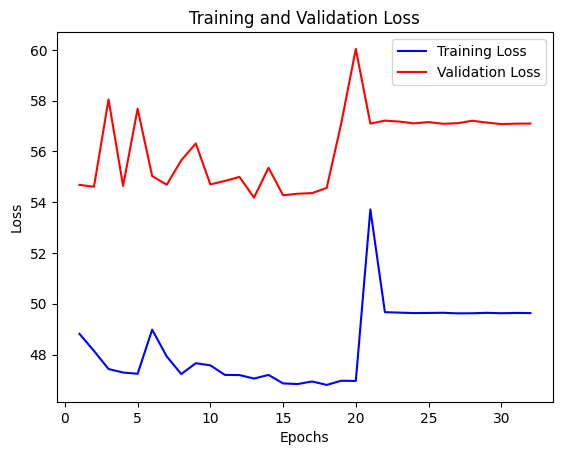

In [34]:
import matplotlib.pyplot as plt

# モデルの訓練時に取得した損失と検証損失の履歴
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# エポック数のリスト（1から始まる）
epochs = range(1, len(train_loss) + 1)

# 損失のプロット
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


125/125 [==============================] - 0s 2ms/step


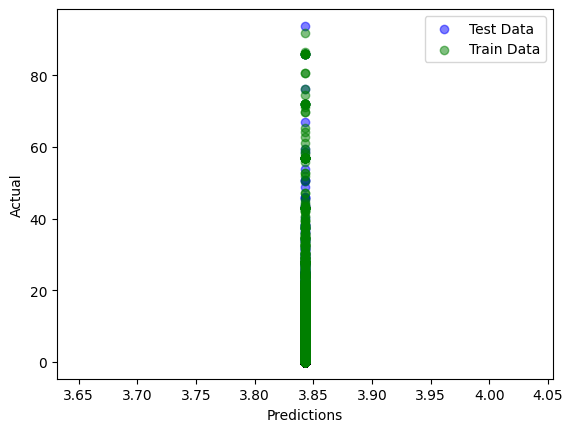

In [35]:
# Testデータに対する予測結果の散布図
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

plt.scatter(test_predictions, y_test, alpha=0.5, color='blue', label='Test Data')
plt.scatter(train_predictions, y_train, alpha=0.5, color='green', label='Train Data')
plt.plot([min(test_predictions), max(test_predictions)], [min(test_predictions), max(test_predictions)], color='red')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.show()
